# Download AIA data

In [41]:
import sunpy
from sunpy.net import vso
from astropy import units as u
client=vso.VSOClient()

In [55]:
result = client.query(
    vso.attrs.Time((2014, 12, 11, 19, 0, 0),
                   (2014, 12, 11, 19, 7, 0)),
    vso.attrs.Instrument('aia'),
    vso.attrs.Wave(94*u.AA,1700*u.AA))

In [58]:
res = client.get(result, path="/Volumes/500GB/AIA/{file}").wait()

In [59]:
client.get?

In [57]:
result.time_range

<bound method QueryResponse.time_range of <Table length=279>
   Start Time [1]       End Time [1]    Source Instrument   Type  
       str19               str19         str3     str3      str8  
------------------- ------------------- ------ ---------- --------
2014-12-11 19:00:01 2014-12-11 19:00:02    SDO        AIA FULLDISK
2014-12-11 19:00:02 2014-12-11 19:00:03    SDO        AIA FULLDISK
2014-12-11 19:00:06 2014-12-11 19:00:07    SDO        AIA FULLDISK
2014-12-11 19:00:07 2014-12-11 19:00:08    SDO        AIA FULLDISK
2014-12-11 19:00:08 2014-12-11 19:00:09    SDO        AIA FULLDISK
2014-12-11 19:00:11 2014-12-11 19:00:12    SDO        AIA FULLDISK
2014-12-11 19:00:11 2014-12-11 19:00:12    SDO        AIA FULLDISK
2014-12-11 19:00:13 2014-12-11 19:00:14    SDO        AIA FULLDISK
2014-12-11 19:00:14 2014-12-11 19:00:15    SDO        AIA FULLDISK
2014-12-11 19:00:16 2014-12-11 19:00:17    SDO        AIA FULLDISK
                ...                 ...    ...        ...      ...
2

# Testing Mapcubed

In [1]:
from sunpy.map import MapCubed
from sunpy.map import Map
import glob
import astropy.units as u
from sunpy.time import parse_time
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('image', interpolation='nearest')
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
data_dir = '/Volumes/500GB/AIA/'
str_indices = {'94':'', '131':'', '171':'', '193':'', '211':'', '304':'', '335':'', '1600':'', '1700':''}
file_list = {}
maps = {}

In [4]:
for key in str_indices:
    file_list.update({key: glob.glob(data_dir + '*' + key + '*.fits')})

In [5]:
these_files = file_list['94'][30:60]
#print(these_files)

maps = []

for f in these_files:
    maps.append(Map(f))

cubed = MapCubed(maps)

In [6]:
x_range = u.Quantity([-900, 0], 'arcsec')
y_range = u.Quantity([-700, 200], 'arcsec')

scubed = cubed.submap(x_range, y_range)


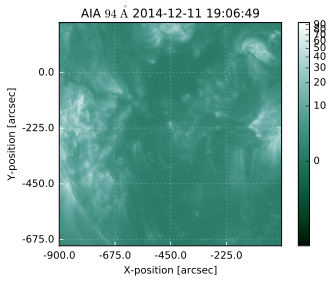

In [7]:
scubed.mean().plot()
plt.colorbar()

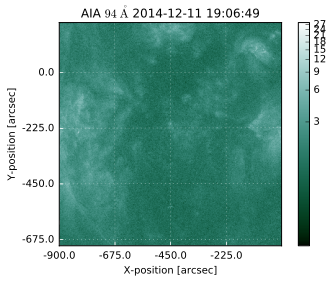

In [8]:
scubed.std().plot()
plt.colorbar()

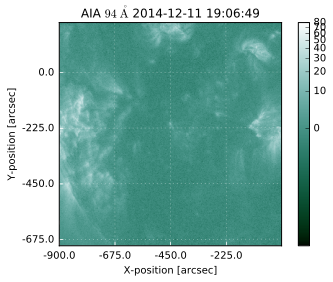

In [9]:
scubed.min().plot()
plt.colorbar()

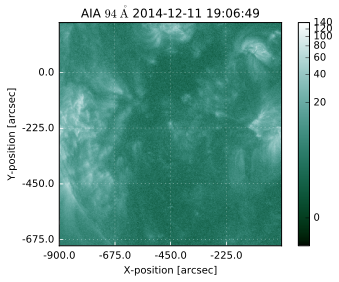

In [10]:
scubed.max().plot()
plt.colorbar()

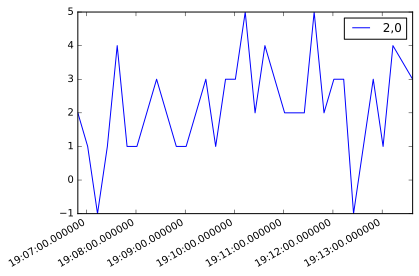

In [11]:
scubed.lightcurve(2,0).plot()

In [12]:
scubed.dimensions

(1497, 1503)

In [13]:
sscubed = scubed.superpixel(u.Quantity([15 * u.pixel, 15 * u.pixel]))

[ 0.  0.] pix


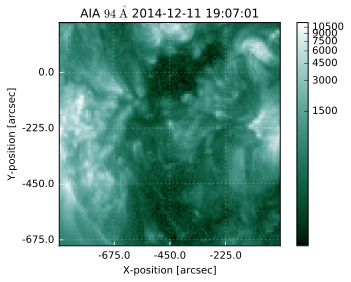

In [41]:
#%matplotlib auto
%matplotlib inline
sscubed[1].plot()
plt.colorbar()

In [40]:
sscubed.dimensions

(99, 100)

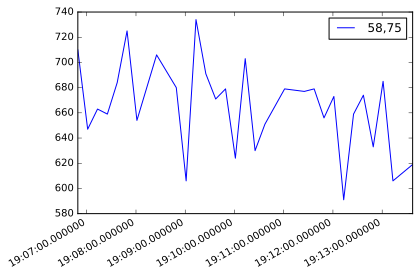

In [31]:
sscubed.lightcurve(58,75).plot()

In [17]:
type(sscubed.lightcurve(2,0).data)

pandas.core.frame.DataFrame

In [34]:
a=sscubed.lightcurve(58,75).data

In [35]:
a.values

array([[710],
       [647],
       [663],
       [659],
       [684],
       [725],
       [654],
       [706],
       [680],
       [606],
       [734],
       [691],
       [671],
       [679],
       [624],
       [703],
       [630],
       [651],
       [679],
       [677],
       [679],
       [656],
       [673],
       [591],
       [659],
       [674],
       [633],
       [685],
       [606],
       [619]])

In [20]:
type(sscubed.data)

numpy.ndarray

In [21]:
sscubed.data.shape

(100, 99, 30)